In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as lines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Elliptic functions and integrals:

Consider an ellipse with semi-major axis $a$, semi-minor axis $b$, and eccentricity $k\equiv\sqrt{1-(b/a)^2}$:

$$
\left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 = 1
$$

As usual let

$$
x = r\cos\theta\,,\qquad
y = r\sin\theta\,,\qquad
r^2 = x^2 + y^2
$$

For a given $k$, define the following three functions

$$
{\rm cn}(u,k) \equiv x/a\,,\qquad
{\rm sn}(u,k) \equiv y/b\,,\qquad
{\rm dn}(u,k) \equiv r/a
$$

where the argument $u$ is defined by 

$$
u \equiv \frac{1}{b}\int_0^\theta r\,d\theta
$$

Then it's easy to show that

$$
{\rm cn}^2 u + {\rm sn}^2 u = 1\,,\qquad
{\rm dn}^2 u + k^2{\rm sn}^2 u = 1
$$

where we have dropped the $k$ dependence above (and henceforth) to simplify the notation.

One can also prove the following differential identities:

$$
\frac{d}{du}{\rm sn}\,u = {\rm cn}\,u\,{\rm dn}\,u\,,
\qquad
\frac{d}{du}{\rm cn}\,u = -{\rm sn}\,u\,{\rm dn}\,u\,,
\qquad
\frac{d}{du}{\rm dn}\,u = -k^2 {\rm sn}\,u\,{\rm cn}\,u
$$

These equations can be integrated, e.g., the first being

$$
u + {\rm cons}= \int \frac{d\,({\rm sn}\,u)}{{\rm cn}\, u\,{\rm dn}\, u}
=\int \frac{dt}{\sqrt{1-t^2}\sqrt{1- k^2 t^2}}
\quad{\rm where}\quad t= {\rm sn}\,u
$$

or, equivalently,

$$
\int 
\frac{dt}{\sqrt{1-t^2}\sqrt{1- k^2 t^2}}
={\rm sn}^{-1}(t;k) + {\rm const}
$$

This equation is typically written in mathematical handbooks as the _Jacobi elliptic function of the 1st kind_ with _amplitude_ $\phi$ and _modulus_ $k$:

$$
F(\phi, k)\equiv
\int_0^{\sin\phi} 
\frac{dt}{\sqrt{1-t^2}\sqrt{1- k^2 t^2}}
$$

Setting $\sin\phi =1$ gives the complete elliptic integral of 1st kind:

$$
K(k)\equiv F(\pi/2, k) = \int_0^1 \frac{dt}{\sqrt{1-t^2}\sqrt{1-k^2 t^2}}
$$

There are also Jacobi elliptic functions and complete elliptic integrals of the 2nd and 3rd kind:

2nd kind:

$$
E(\phi, k)\equiv
\int_0^{\sin\phi} dt\>\frac{\sqrt{1- k^2 t^2}}{\sqrt{1- t^2}}\,,
\qquad
E(k) \equiv \int_0^1 dt\>\frac{\sqrt{1-k^2 t^2}}{\sqrt{1-t^2}}
$$

3rd kind:

$$
\pi(n, \phi, k)\equiv
\int_0^{\sin\phi}\>\frac{dt}{(1-n t^2)\sqrt{1-t^2}\sqrt{1-k^2 t^2}}\,,
\qquad
\pi(n, k) \equiv \int_0^1\>\frac{dt}{(1-n t^2)\sqrt{1-t^2}\sqrt{1-k^2 t^2}}
$$

The Jacobi elliptic functions and complete elliptic integrals of the 2nd kind arise when computing the arclength along the circumference of an ellipse.

NOTE: The functions ${\rm sn}(u,k)$, ${\rm cn}(u,k)$ are generalizations of the circular functions $\sin\theta$, $\cos\theta$ to an ellipse with eccentricity $k$.  When $k=0$, $u\rightarrow\theta$, 
${\rm sn}\rightarrow \sin$, ${\rm cn}\rightarrow \cos$, and ${\rm dn}\rightarrow 1$.

The Jacobi elliptic parameter $\phi$ is related to $u$ via:

$$
\sin\phi = {\rm sn}\,(u,k)
\qquad\text{or}\qquad
\cos\phi = {\rm cn}\,(u,k)
$$

The angle $\phi$ gives us a different parameterization of the ellipse defined by

$$
x = a\cos\phi\,,\qquad
y = b\sin\phi
$$

Note that $\phi$ is not the same as the polar coordinate angle $\theta$ nor the elliptic parameter $u$.  These three parameters are related by

$$
x = r\cos\theta = a\cos\phi = a\,{\rm cn}\,(u,k)\,,
\qquad
y = r\sin\theta = b\sin\phi = b\,{\rm sn}\,(u,k)
$$


## Plot sn(u,k), cn(u,k), and dn(u,k) for different values of k

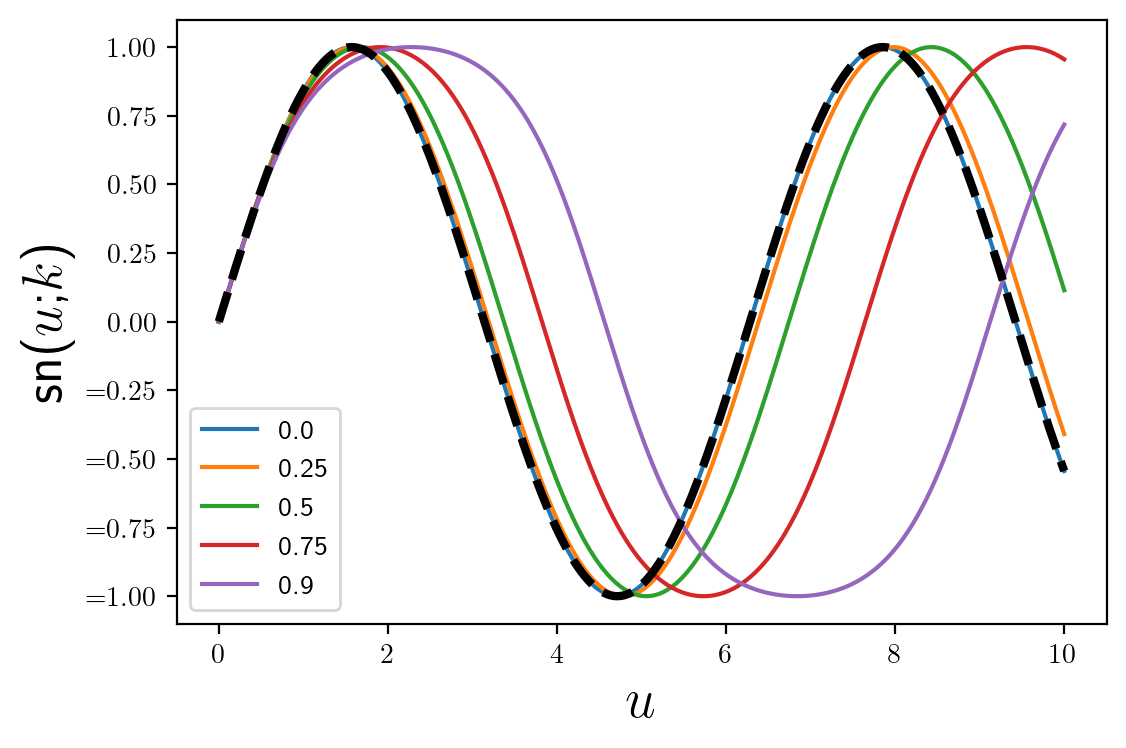

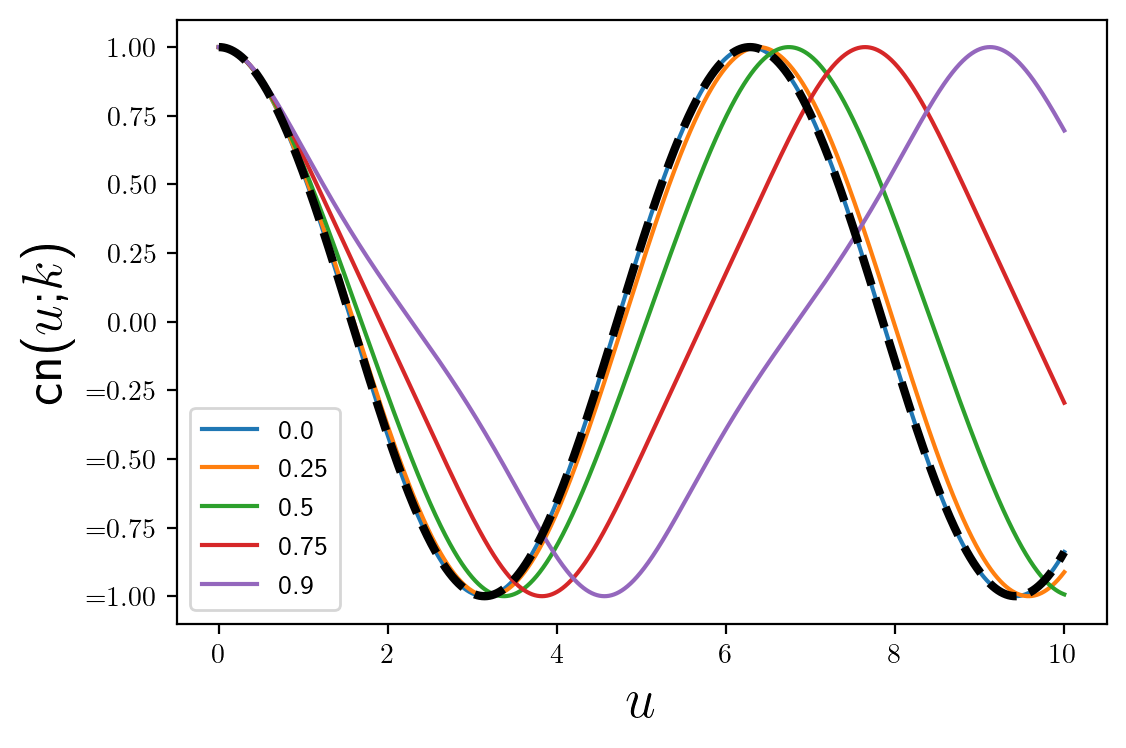

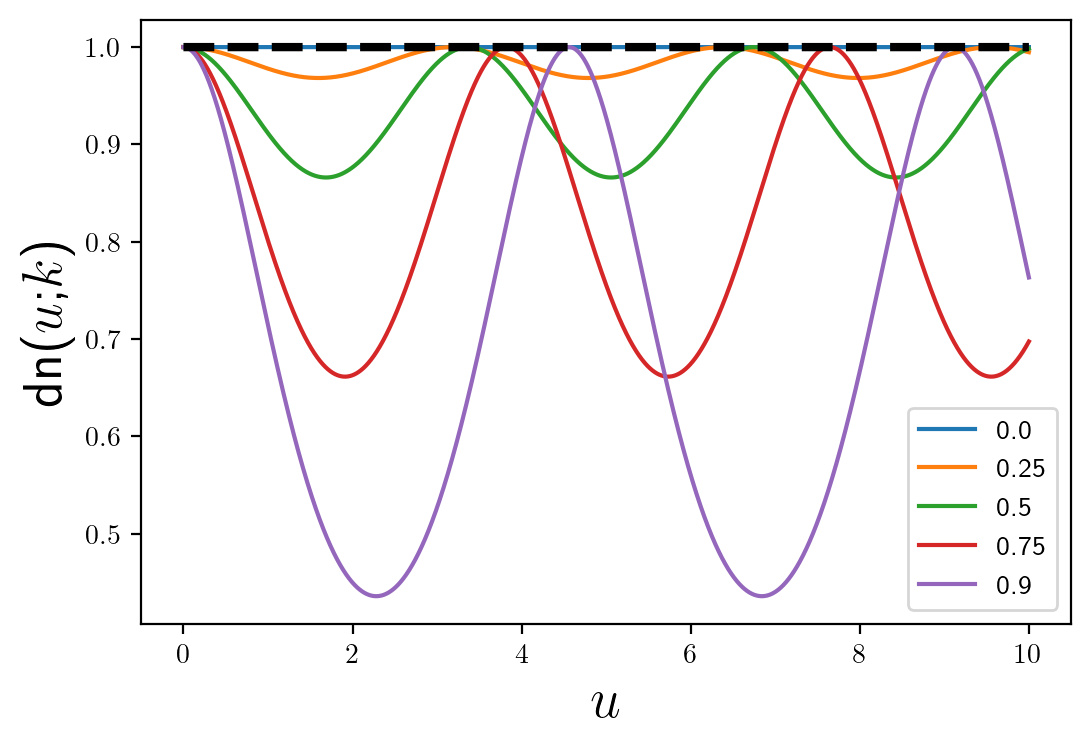

In [3]:
# discrete u values
u = np.linspace(0, 10, 10000)

# consider several different values for k
k = np.array([0, 0.25, 0.5, 0.75, 0.9])

# make plots of sn(u,k)
plt.figure()
plt.xlabel('$u$', size=20)
plt.ylabel('sn($u$;$k$)', size=20)
for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    plt.plot(u, sn_u)
    
_=plt.legend(k)

# compare with ordinary sine function
sin_u = np.sin(u)
plt.plot(u, sin_u, color='k', ls='--', lw=3)

##################################################
# make plots of cn(u,k)
plt.figure()
plt.xlabel('$u$', size=20)
plt.ylabel('cn($u$;$k$)', size=20)
for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    plt.plot(u, cn_u)
    
_=plt.legend(k)

# compare with ordinary cosine function
cos_u = np.cos(u)
plt.plot(u, cos_u, color='k', ls='--', lw=3)

###################################################
# make plots of dn(u,k)
plt.figure()
plt.xlabel('$u$', size=20)
plt.ylabel('dn($u$;$k$)', size=20)
for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    plt.plot(u, dn_u)
    
_=plt.legend(k)

# compare with ordinary sine functions
unit = np.ones(len(u))
plt.plot(u, unit, color='k', ls='--', lw=3)

## Plot an ellipse using the sn(u,k), cn(u,k) (or $\sin\phi$, $\cos\phi$) functions

k = 0.998749217771909
m = k^2 = 0.9975
period = 17.53657292853668
circumference = 80.38851238291923
approx circumference = 88.96866150321509
1st order approx to circumference = 94.32631942403354


Text(0, 0.5, '$y$')

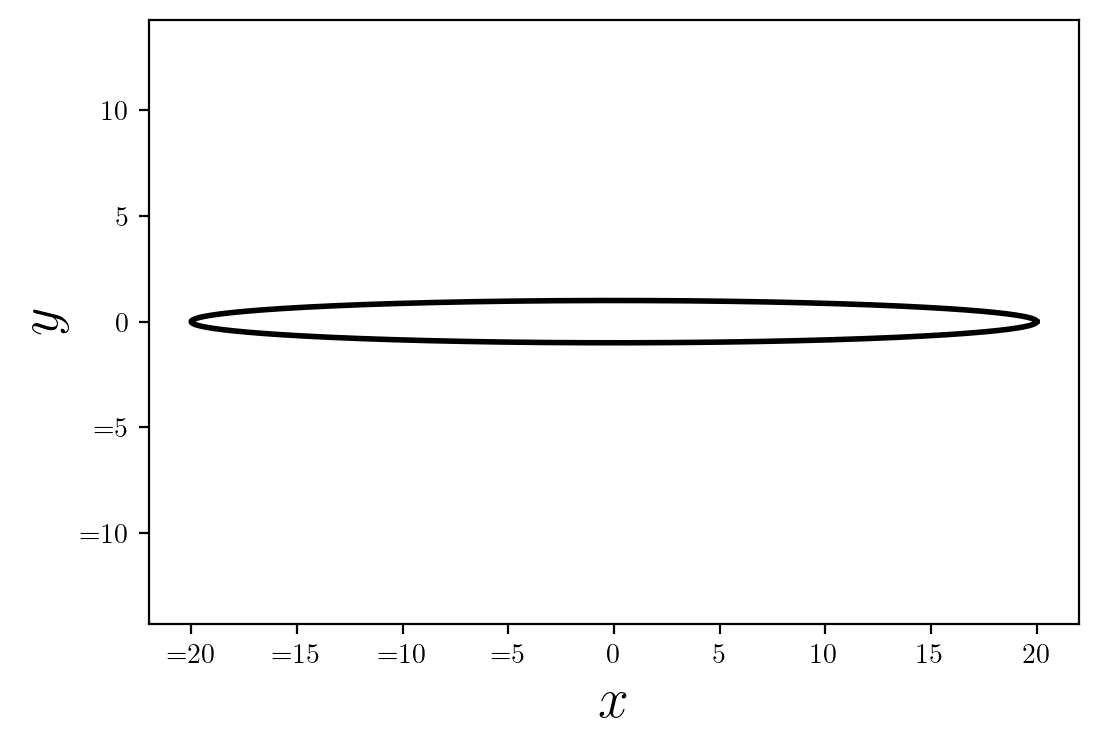

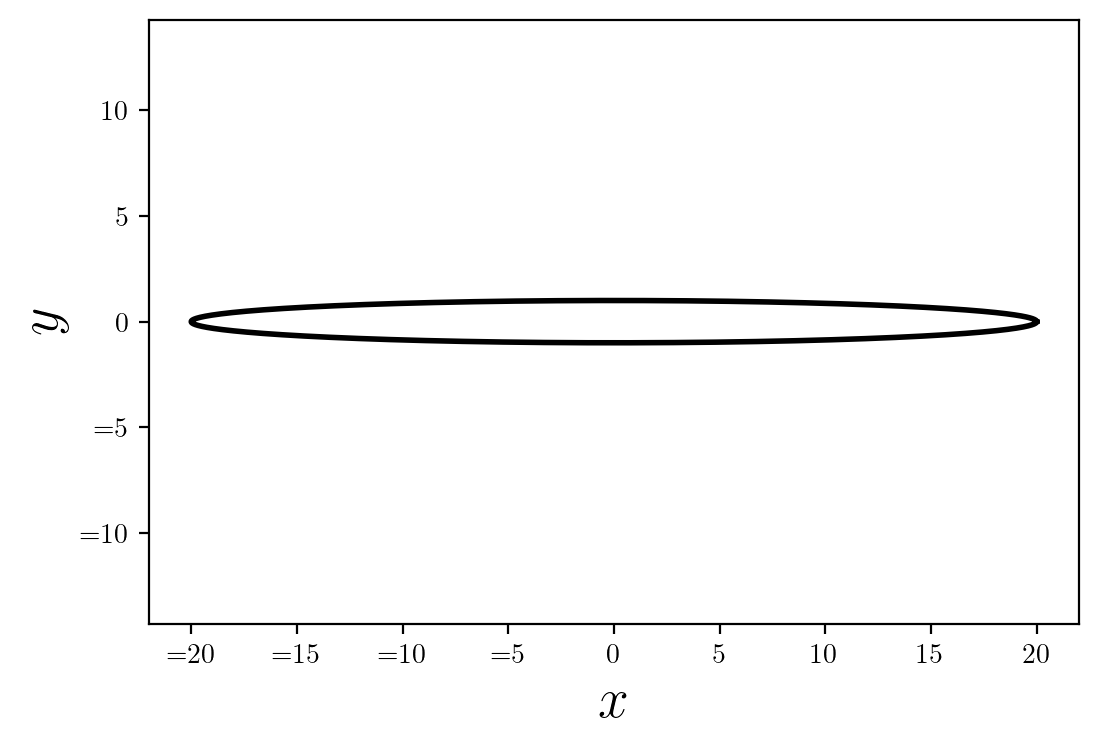

In [4]:
# semi-major, semi-minor axes
a = 20.
b = 1.

# calculate eccentricity
k = np.sqrt(1-(b/a)**2)
m = k**2 # scipy uses m=k^2
print('k =', k)
print('m = k^2 =', m)

# period
P = 4*special.ellipk(m)
print('period =', P)

# circumference
C = 4*a*special.ellipe(m)
print('circumference =', C)

C_approx = 2*np.pi*np.sqrt((a**2+b**2)/2)
print('approx circumference =', C_approx)

C_1st_order = 2*np.pi*a*(1-k**2/4)
print('1st order approx to circumference =', C_1st_order)

# calculate elliptic functions
u = np.linspace(0, P, 10000)
sn, cn, dn, ph = special.ellipj(u, m)
x = a*cn
y = b*sn

# plot figure
plt.figure()
plt.axis('equal')
plt.plot(x, y, color='k', ls='-', lw=2)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)

# alternative parametrization in terms of ordinary sine, cosine and angle phi
phi = np.linspace(0, 2*np.pi, 10000)
x = a*np.cos(phi)
y = b*np.sin(phi)

# plot figure
plt.figure()
plt.axis('equal')
plt.plot(x, y, color='k', ls='-', lw=2)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)

# plot arc length vs phi and theta (angles defined wrt y-axis, increasing CW)

(0.0, 6.283185307179586)

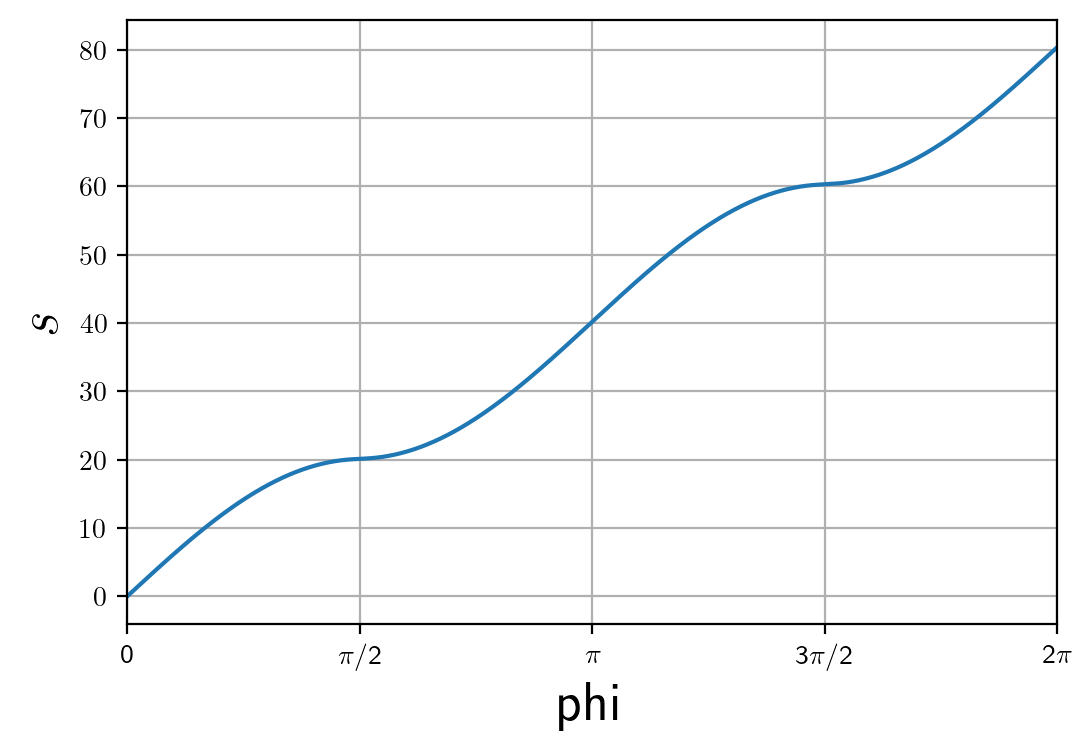

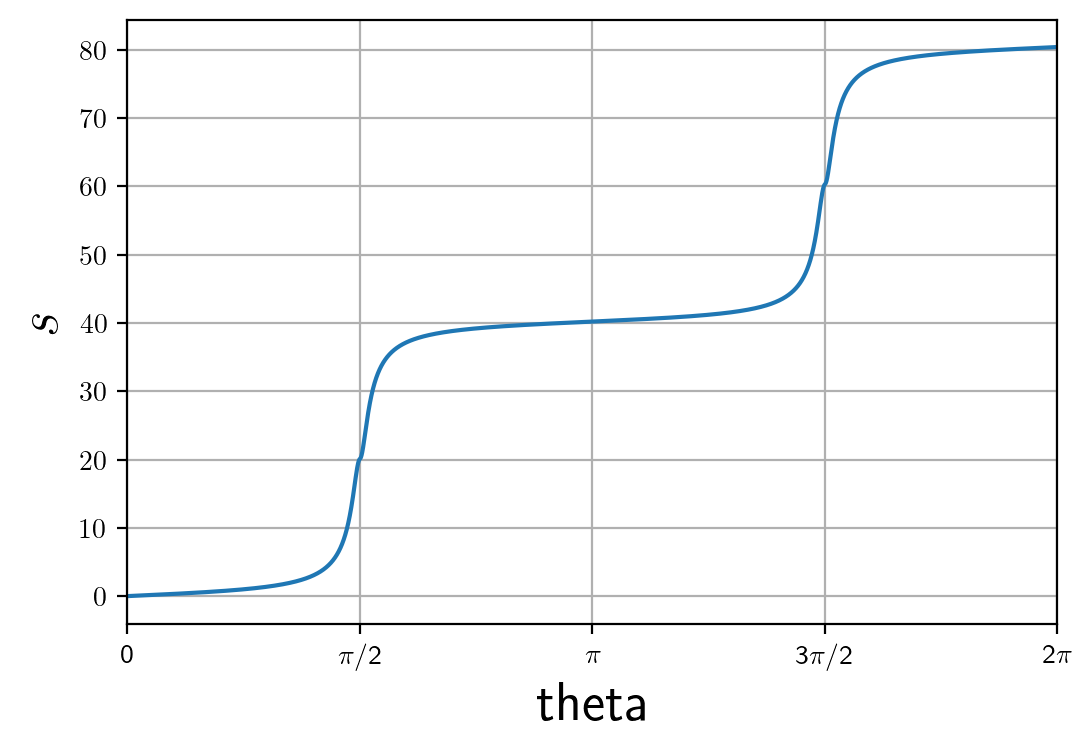

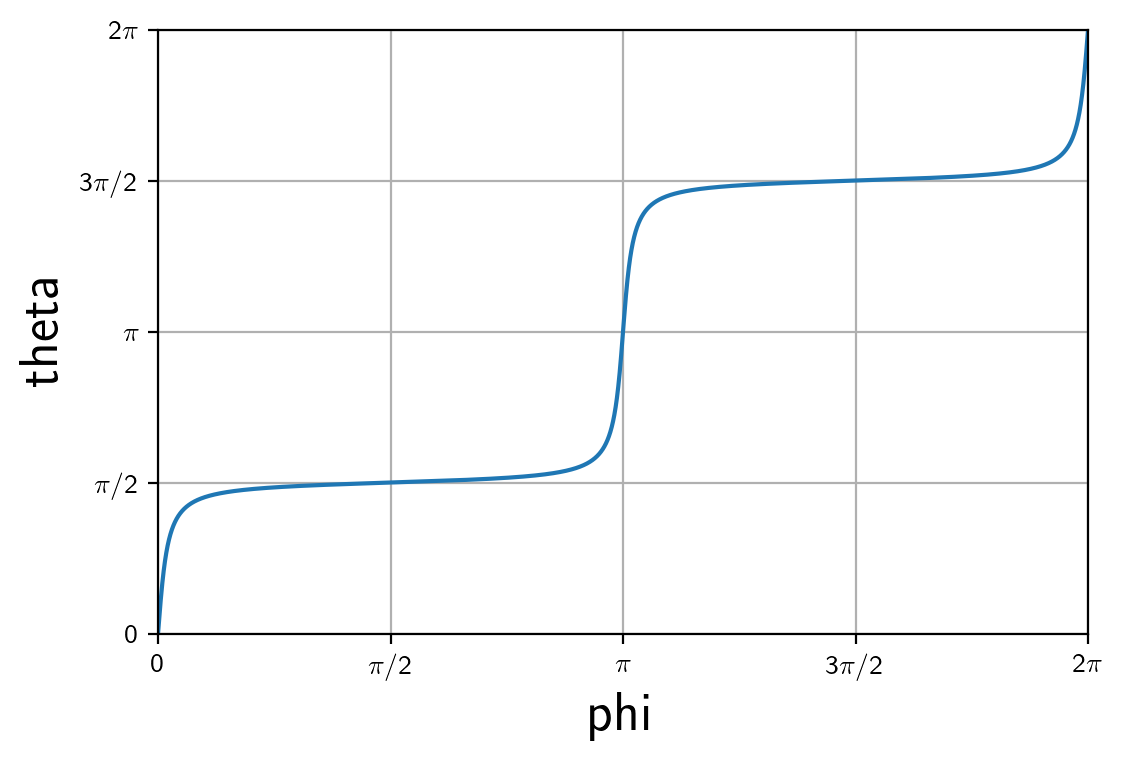

In [5]:
# plot arc length s vs phi
plt.figure()
plt.xlabel('phi', size=20)
plt.ylabel('$s$', size=20)

phi = np.linspace(0, 2*np.pi, 10000)
s_phi = a*special.ellipeinc(phi, m)
plt.plot(phi, s_phi)

# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)   
plt.grid('on')
plt.xlim(0, 2*np.pi)

##########################################
# plot arc length s vs theta
plt.figure()
plt.xlabel('theta', size=20)
plt.ylabel('$s$', size=20)

theta_phi = np.arctan2(a*np.sin(phi), b*np.cos(phi))
theta_phi = np.unwrap(theta_phi)
plt.plot(theta_phi, s_phi)

# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)   
plt.grid('on')
plt.xlim(0, 2*np.pi)

##########################################
# plot theta vs phi
plt.figure()
plt.xlabel('phi', size=20)
plt.ylabel('theta', size=20)

plt.plot(phi, theta_phi)

# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)
plt.yticks(tick_locs, tick_labels)    
plt.grid('on')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)

## Compare arc length s, u, phi, theta

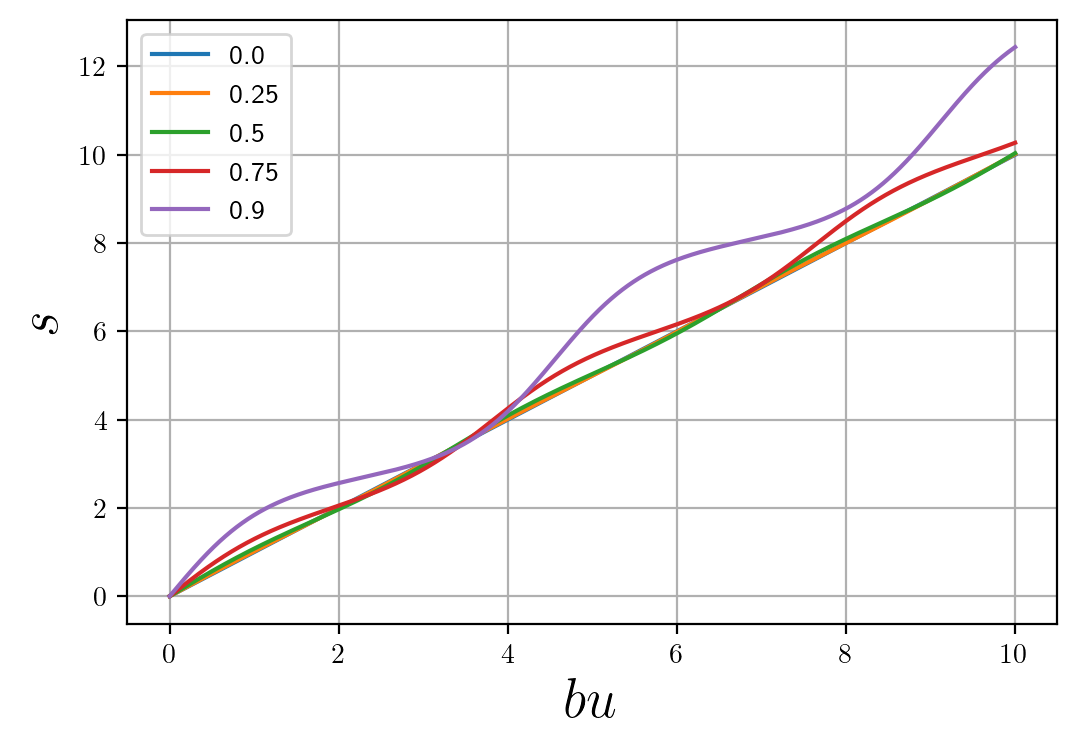

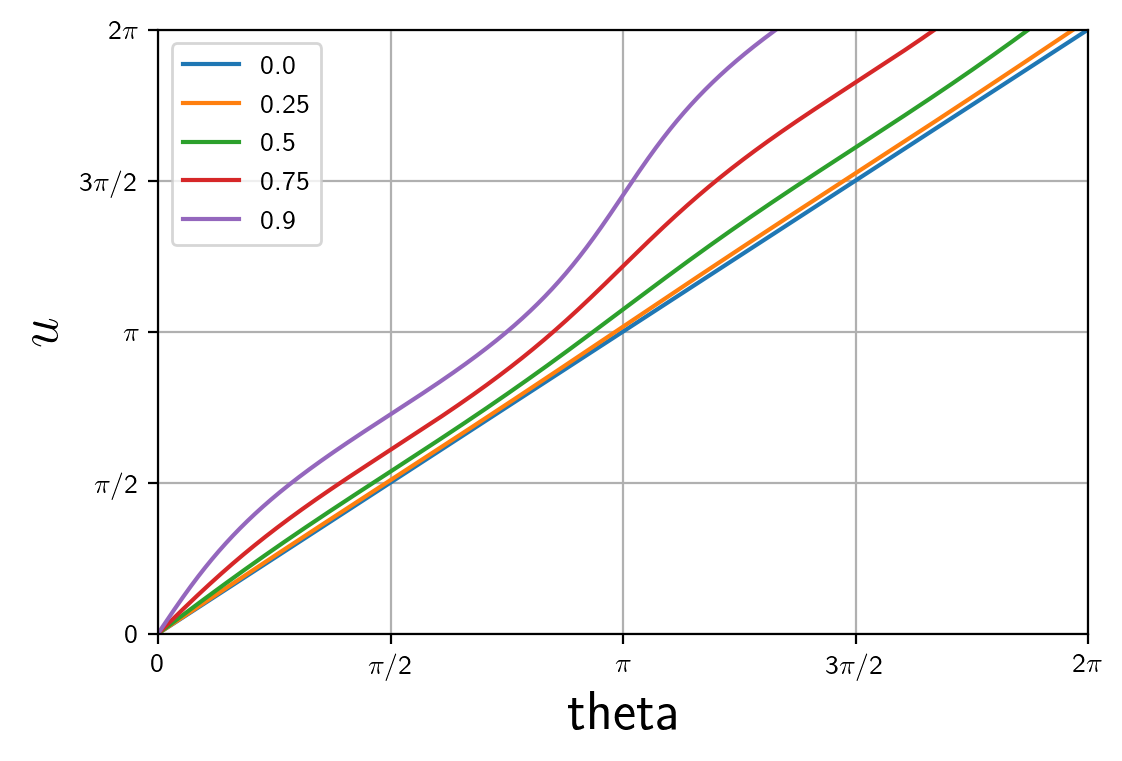

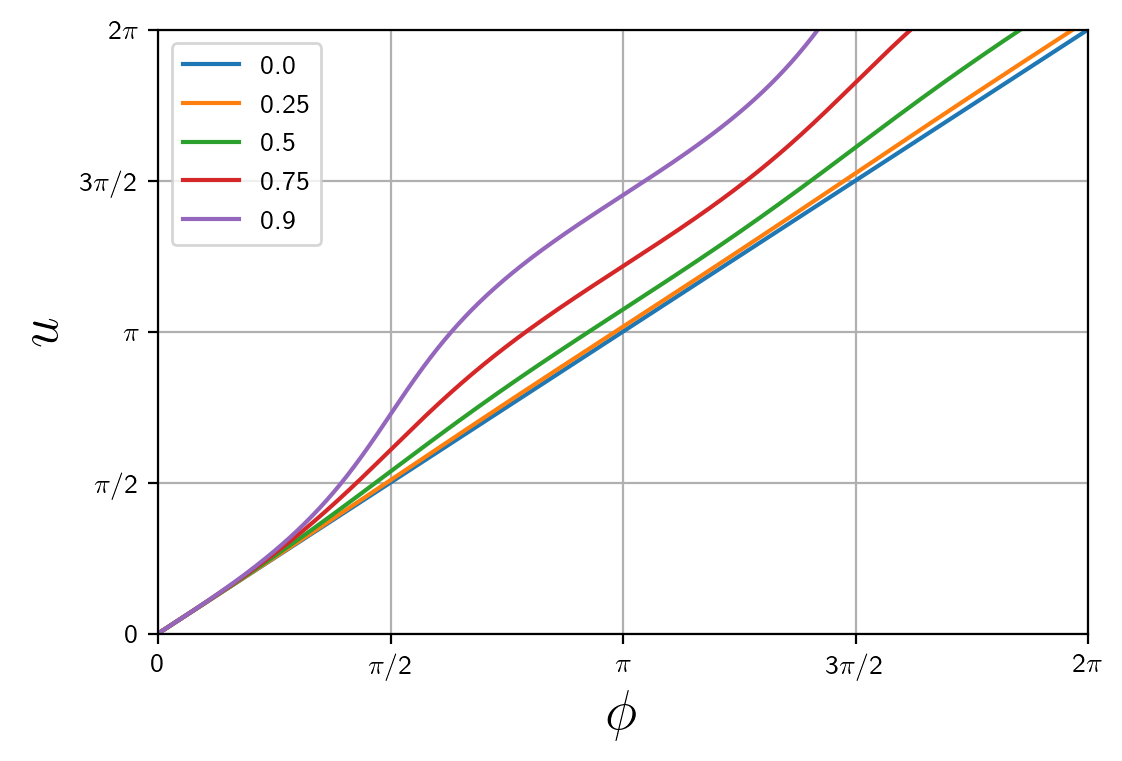

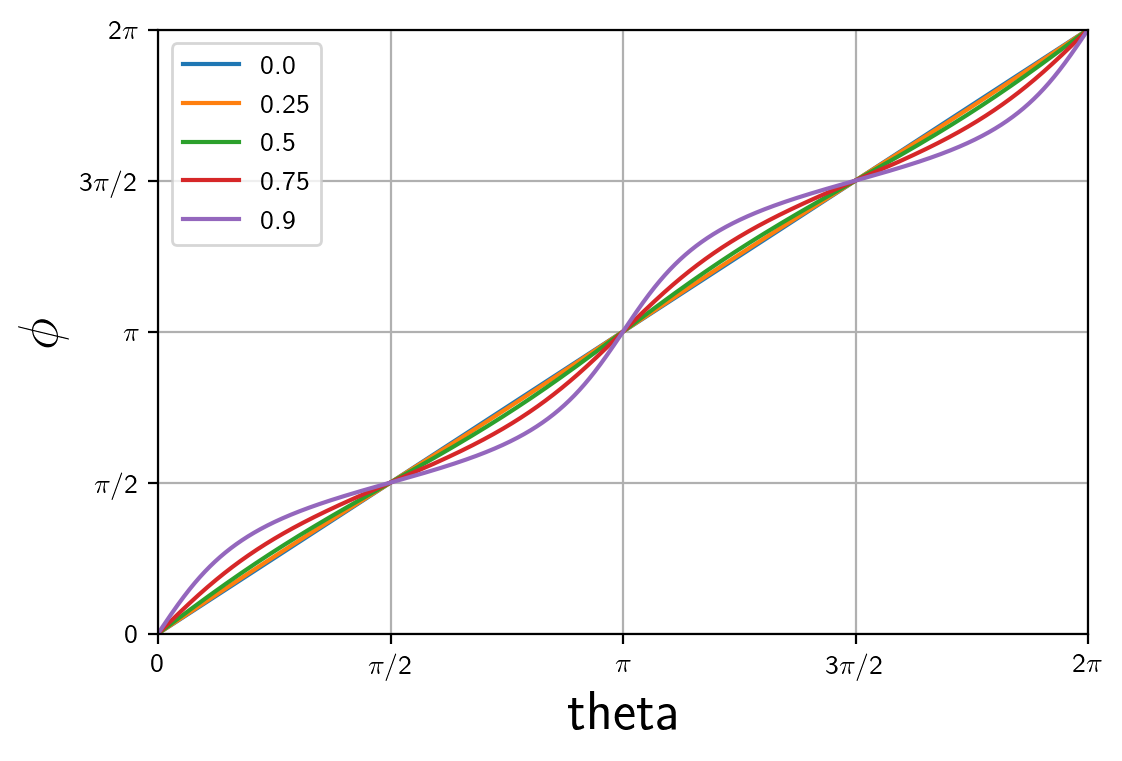

In [6]:
# discrete u values
u = np.linspace(0, 10, 10000)

# consider several different values for k
k = np.array([0, 0.25, 0.5, 0.75, 0.9])

# corresponding values of a and b
b = np.array([1, 1, 1, 1, 1])
a = b/np.sqrt(1-k**2)

##########################################
# plot arc length s vs b*u
plt.figure()
plt.xlabel('$b u$', size=20)
plt.ylabel('$s$', size=20)

for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    
    s_u = a[ii]*special.ellipeinc(ph_u, m)
    plt.plot(b[ii]*u, s_u)
    
plt.grid('on')
_=plt.legend(k)

##########################################
# plot u vs theta
# x = r cos(theta) = a cos(phi) = a cn(u;k)
# y = r sin(theta) = b sin(phi) = b sn(u;k)
plt.figure()
plt.xlabel('theta', size=20)
plt.ylabel('$u$', size=20)

for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    theta_u = np.arctan2(b[ii]*sn_u, a[ii]*cn_u)
    theta_u = np.unwrap(theta_u)
    plt.plot(theta_u, u)
    
# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)
plt.yticks(tick_locs, tick_labels)    
plt.grid('on')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
_=plt.legend(k)

########################################
# plot u vs phi 
plt.figure()
plt.xlabel('$\phi$', size=20)
plt.ylabel('$u$', size=20)

for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    plt.plot(ph_u, u)

# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)
plt.yticks(tick_locs, tick_labels)    
plt.grid('on')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
_=plt.legend(k)

#########################################################
# plot phi vs theta
# x = r cos(theta) = a cos(phi) = a cn(u;k)
# y = r sin(theta) = b sin(phi) = b sn(u;k)
plt.figure()
plt.xlabel('theta', size=20)
plt.ylabel('$\phi$', size=20)

for ii in range(len(k)):
    m = k[ii]**2 # scipy uses m=k^2
    sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
    theta_u = np.arctan2(b[ii]*sn_u, a[ii]*cn_u)
    theta_u = np.unwrap(theta_u)
    plt.plot(theta_u, ph_u)
    
    # alternative
    #phis= np.linspace(0, 2*np.pi, 10000)
    #thetas = np.arctan2(b[ii]*np.sin(phis), a[ii]*np.cos(phis))
    #thetas = np.unwrap(thetas)
    #plt.plot(thetas, phis)
    
# change tick marks to multiples of pi/2
eps = 0.01
tick_locs = np.arange(0, 3*np.pi+eps, np.pi/2)
tick_labels = ['0', '$\pi$/2', '$\pi$', '3$\pi$/2', '2$\pi$', '5$\pi$/2', '3$\pi$']
plt.xticks(tick_locs, tick_labels)
plt.yticks(tick_locs, tick_labels)    
plt.grid('on')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
_=plt.legend(k)

## Make a figure showing the relationship between $\phi$ and $\theta$

Text(0, 0.5, '$y$')

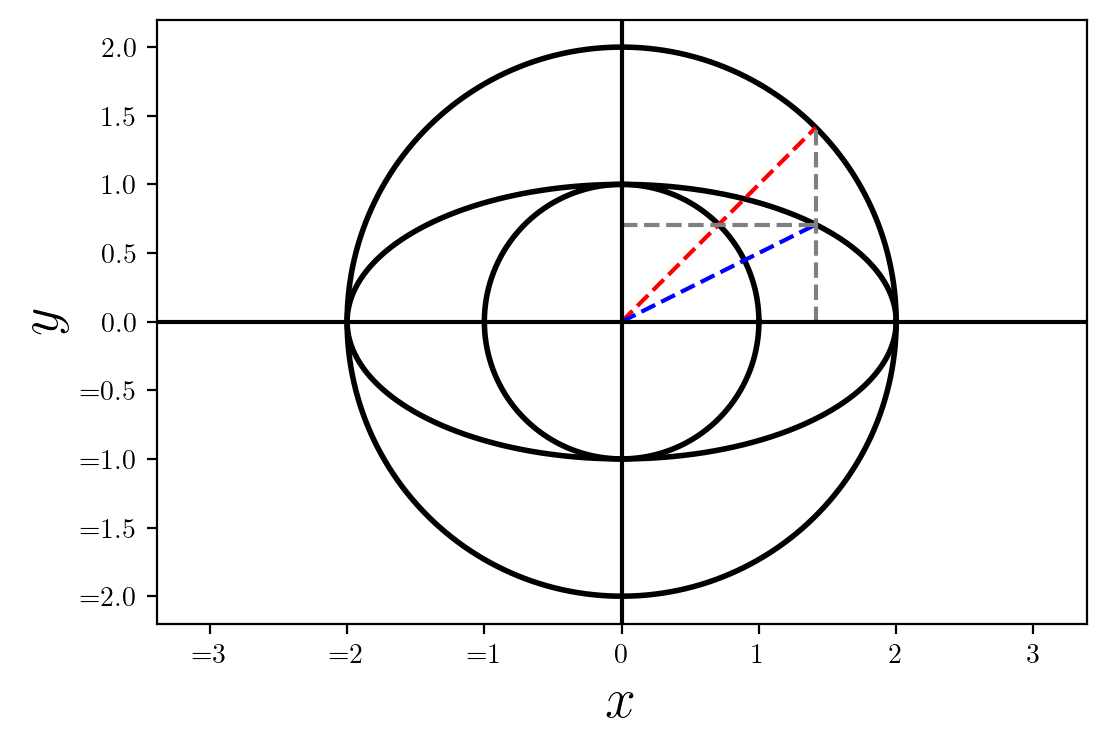

In [7]:
# semi-major, semi-minor axes
a = 2.
b = 1.

# define phi array
phis= np.linspace(0, 2*np.pi, 10000)

# calculate corresponding theta values
thetas = np.arctan2(b*np.sin(phis), a*np.cos(phis))
thetas = np.unwrap(thetas)

# ellipse and relevant circles
x_ellipse = a*np.cos(phis)
y_ellipse = b*np.sin(phis)

x_a = a*np.cos(phis)
y_a = a*np.sin(phis)

x_b = b*np.cos(phis)
y_b = b*np.sin(phis)

# particular value of theta and phi
phi0 = np.deg2rad(45)
theta0 = np.arctan2(b*np.sin(phi0), a*np.cos(phi0))
x0 = a*np.cos(phi0)
y0 = b*np.sin(phi0)
r0 = np.sqrt(x0**2 + y0**2)

# plot ellipse, circles, and lines showing theta0 and phi0
plt.figure()

plt.plot(x_ellipse, y_ellipse, color='k', ls='-', lw=2)
plt.plot(x_a, y_a, color='k', ls='-', lw=2)
plt.plot(x_b, y_b, color='k', ls='-', lw=2)

plt.plot([0, a*np.cos(phi0)], [0, a*np.sin(phi0)], c='red', ls='--')
plt.plot([0, x0], [0, y0], c='blue', ls='--')
plt.plot([x0, x0], [0, a*np.sin(phi0)], c='grey', ls='--')
plt.plot([0, x0], [y0, y0], c='grey', ls='--')

plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.axis('equal')
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)

## Simple pendulum: compare small-angle and exact calculation

phi0 = 40.0  degrees
small angle  = 2.007089923154493 sec
1st order    = 2.0682293785216155 sec
exact period = 2.069993163286821  sec


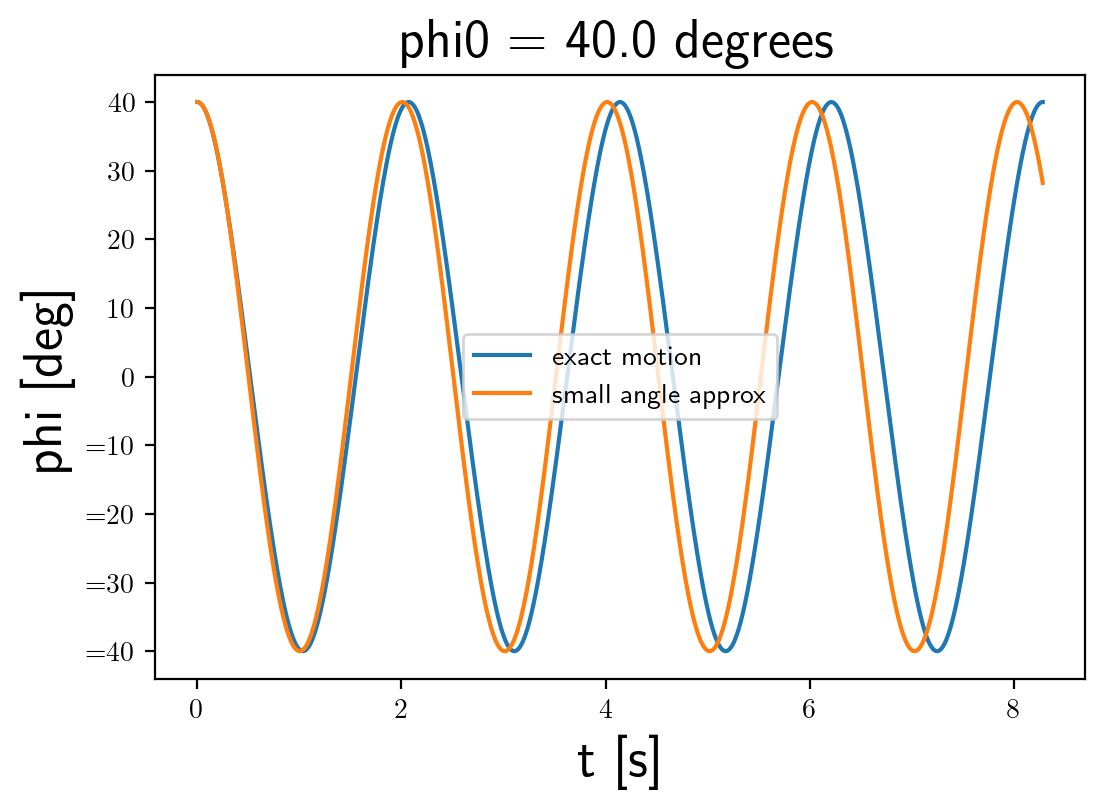

In [8]:
# see L&L prob 11.1, K&S prob 1.7

# choose maximum angle phi0 (E = mgl(1-cos(phi0)))
phi0 = np.deg2rad(40)
print('phi0 =', np.rad2deg(phi0), ' degrees')

# modulus k
k = np.sin(phi0/2)
m = k**2 # scipy has K(m) where m=k^2

# constants
g = 9.8 # m/s^2
ell = 1 # m

# small angle approximation angular frequency and period
omega0 = np.sqrt(g/ell)
P0 = 2*np.pi/omega0

# actual period
P = (4/omega0)*special.ellipk(m)

# 1st order correction to the period
P1 = P0*(1 + phi0**2/16)

# display periods
print('small angle  =', P0, 'sec')
print('1st order    =', P1, 'sec')
print('exact period =', P, ' sec')

# discrete times
t = np.linspace(0, 4*P, 10000)

# time evolution for phi
x = omega0*t
u = -x + special.ellipk(m)
sn_u, cn_u, dn_u, ph_u = special.ellipj(u, m)
phi = 2*np.arcsin(k*sn_u)

# alternative expression for phi
x = omega0*t
sn_x, cn_x, dn_x, ph_x = special.ellipj(x, m)
phi = 2*np.arcsin(k*cn_x)

# make plots
plt.figure()
plt.plot(t, np.rad2deg(phi), t, np.rad2deg(phi0)*np.cos(omega0*t))
plt.xlabel('t [s]', size=20)
plt.ylabel('phi [deg]', size=20)
plt.legend(('exact motion', 'small angle approx'))
titlestr = 'phi0 = ' + str(np.rad2deg(phi0)) + ' degrees'
_=plt.title(titlestr, size=20)